### Import library yang digunakan

In [85]:
import numpy as np
import pandas as pd
import random as rd
from random import randint
import matplotlib.pyplot as plt

Inisiasi Variabel

In [86]:
solutions_per_pop = 80
num_generations = 100
crossover_rate = 0.7
mutation_rate = 0.9

### Barang-barang yang dibawa

#### Barang dalam koper

In [87]:
item_number = np.arange(1,16)
item_name = np.array(["Pakaian", "Laptop", "Dokumen", "Alat Mandi", "Buku & Alat Tulis", "Kamera", "Sendal", "Makanan", "Selimut", "Boneka", "Sepatu", "Alat Rekreasi", "Minuman", "Alat Elektronik Lain", "Alat Sholat"])
weight = np.array([2, 3, 1, 2, 3, 3, 1, 3, 1, 1, 1, 3, 2, 2, 1])
value = np.array([422, 380, 321, 376, 290, 350, 245, 320, 300, 120, 300, 190, 251, 280, 340])
knapsack_threshold = 16    #Berat maksimal pada koper
print('The list is as follows:')
print('Item No.   Weight   Value')
for i in range(item_number.shape[0]):
    print('{0}          {1}         {2}         {3}\n'.format(item_number[i], item_name[i], weight[i], value[i]))

The list is as follows:
Item No.   Weight   Value
1          Pakaian         2         422

2          Laptop         3         380

3          Dokumen         1         321

4          Alat Mandi         2         376

5          Buku & Alat Tulis         3         290

6          Kamera         3         350

7          Sendal         1         245

8          Makanan         3         320

9          Selimut         1         300

10          Boneka         1         120

11          Sepatu         1         300

12          Alat Rekreasi         3         190

13          Minuman         2         251

14          Alat Elektronik Lain         2         280

15          Alat Sholat         1         340



#### Barang keseluruhan

In [88]:
# item_number = np.arange(1,6)
# item_name = np.array(["Koper", "Gitar", "Peralatan Gaming", "Oleh-oleh", "Tripod", "Tas Jinjing"])
# weight = np.array([16, 2, 4, 6, 1, 3])
# value = np.array([680, 350, 420, 348, 320, 400])
# knapsack_threshold = 22    #Maximum weight that the bag of thief can hold 
# print('The list is as follows:')
# print('Item No.   Weight   Value')
# for i in range(item_number.shape[0]):
#     print('{0}          {1}         {2}         {3}\n'.format(item_number[i], item_name[i], weight[i], value[i]))

### Membuat populasi awal

In [89]:
pop_size = (solutions_per_pop, item_number.shape[0])
print('Population size = {}'.format(pop_size))
initial_population = np.random.randint(2, size = pop_size)
initial_population = initial_population.astype(int)
print('Initial population: \n{}'.format(initial_population))

Population size = (80, 15)
Initial population: 
[[1 0 1 ... 0 0 0]
 [1 1 1 ... 0 1 0]
 [1 1 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 0 1]
 [0 1 1 ... 1 0 1]
 [0 0 1 ... 0 0 1]]


### Menghitung nilai fitness

In [90]:
def cal_fitness(weight, value, population, threshold):
    fitness = np.empty(population.shape[0])
    for i in range(population.shape[0]):
        S1 = np.sum(population[i] * value)
        S2 = np.sum(population[i] * weight)
        if S2 <= threshold:
            fitness[i] = S1
        else :
            fitness[i] = 0
    return fitness.astype(int)


### Melakukan seleksi parent

In [91]:
def selection(fitness, num_parents, population):
    fitness = list(fitness)
    parents = np.empty((num_parents, population.shape[1]))
    for i in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        parents[i,:] = population[max_fitness_idx[0][0], :]
        fitness[max_fitness_idx[0][0]] = -999999
    return parents

### Melakukan single point crossover

In [92]:
def crossover(parents, num_offsprings):
    offsprings = np.empty((num_offsprings, parents.shape[1]))
    crossover_point = int(parents.shape[1]/2)
    i=0
    while (parents.shape[0] < num_offsprings):
        parent1_index = i%parents.shape[0]
        parent2_index = (i+1)%parents.shape[0]
        x = rd.random()
        if x > crossover_rate:
            continue
        parent1_index = i%parents.shape[0]
        parent2_index = (i+1)%parents.shape[0]
        offsprings[i,0:crossover_point] = parents[parent1_index,0:crossover_point]
        offsprings[i,crossover_point:] = parents[parent2_index,crossover_point:]
        i=+1
    return offsprings   

### Melakukan mutasi

In [93]:

def mutation(offsprings):
    mutants = np.empty((offsprings.shape))
    for i in range(mutants.shape[0]):
        random_value = rd.random()
        mutants[i,:] = offsprings[i,:]
        if random_value > mutation_rate:
            continue
        int_random_value = randint(0,offsprings.shape[1]-1)    
        if mutants[i,int_random_value] == 0 :
            mutants[i,int_random_value] = 1
        else :
            mutants[i,int_random_value] = 0
    return mutants 

### Menghitung ulang 

In [94]:
def optimize(weight, value, population, pop_size, num_generations, threshold):
    parameters, fitness_history = [], []
    num_parents = int(pop_size[0]/2)
    num_offsprings = pop_size[0] - num_parents 
    for i in range(num_generations):
        fitness = cal_fitness(weight, value, population, threshold)
        fitness_history.append(fitness)
        parents = selection(fitness, num_parents, population)
        offsprings = crossover(parents, num_offsprings)
        mutants = mutation(offsprings)
        population[0:parents.shape[0], :] = parents
        population[parents.shape[0]:, :] = mutants
        
    print('Last generation: \n{}\n'.format(population)) 
    fitness_last_gen = cal_fitness(weight, value, population, threshold)      
    print('Fitness of the last generation: \n{}\n'.format(fitness_last_gen))
    max_fitness = np.where(fitness_last_gen == np.max(fitness_last_gen))
    parameters.append(population[max_fitness[0][0],:])
    return parameters, fitness_history

### Hasil algoritma

In [95]:
parameters, fitness_history = optimize(weight, value, initial_population, pop_size, num_generations, knapsack_threshold)
print('The optimized parameters for the given inputs are: \n{}'.format(parameters))
selected_items = item_number * parameters
print('\nBarang terpilih tanpa memenuhi kapasitas koper:')
for i in range(selected_items.shape[1]):
  if selected_items[0][i] != 0:
     print('{}\n'.format(selected_items[0][i]))

Last generation: 
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 [1 1 1 ... 1 0 1]]

Fitness of the last generation: 
[3215 3215 3215 3215 3215 3215 3215 3215 3215 3215 3215 3215 3215 3215
 3215 3215 3215 3215 3215 3215 3215 3215 3215 3215 3215 3215 3215 3215
 3215 3215 3215 3215 3215 3215 3215 3215 3215 3215 3215 3215 2073 2915
 2793 2894 3215 2915 2835 2894    0 2935 2915 2839    0 2915 3215 2970
 2835    0 2915 2875 2935 2875 2835 2915    0    0    0    0    0 2875
    0 2915    0    0    0    0    0 3215 2793 2935]

The optimized parameters for the given inputs are: 
[array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1])]

Barang terpilih tanpa memenuhi kapasitas koper:
1

2

3

4

7

9

11

13

14

15



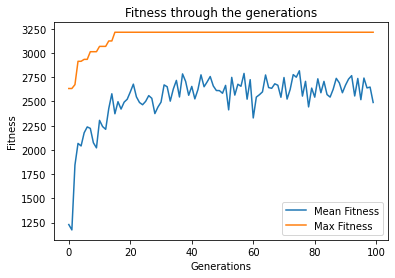

(100, 80)


In [96]:
fitness_history_mean = [np.mean(fitness) for fitness in fitness_history]
fitness_history_max = [np.max(fitness) for fitness in fitness_history]
plt.plot(list(range(num_generations)), fitness_history_mean, label = 'Mean Fitness')
plt.plot(list(range(num_generations)), fitness_history_max, label = 'Max Fitness')
plt.legend()
plt.title('Fitness through the generations')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()
print(np.asarray(fitness_history).shape)